In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")

In [3]:
#see the first 5 row
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Look at the median_house_value variable. Does it have a long tail?

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

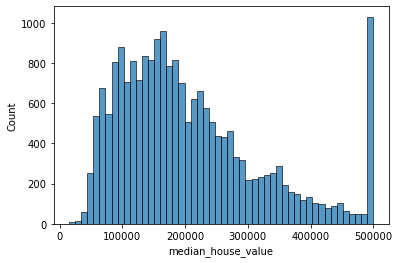

In [4]:
#use hisplot to see the distribution of data
sns.histplot(df["median_house_value"], bins=50)

Long tail is a condition where the most data is located in the specific value (low range), but the other range value, total data is very shallow.

Based on this result, we can conclude that media_house_value variable has not a long tail condition, because the distribution of median_house_value concentrate in each value.

# FEATURES

#select only
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
Select only them

In [5]:
df = df[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

In [6]:
df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


# Question 1
Find a feature with missing values. How many missing values does it have?

In [7]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

There is 207 row missing value in the total_bedrooms column

# What's the median (50% percentile) for variable 'population'?

In [8]:
median = df['population'].median()
median

1166.0

Median for variable population in the dataset is 1166

# Split the data
- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('median_house_value') is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [9]:
np.random.seed(42)

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train+n_val]
df_test = df_shuffled.iloc[n_train+n_val:]

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

In [12]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [13]:
#if fill missing valuw with 0
def prepare_X_with_zero(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [14]:
#if fill missing valuw with mean
import statistics
mean = statistics.mean(df_train['total_bedrooms'])
def prepare_X_with_mean(df):
    df_num = df.fillna(mean)
    X = df_num.values
    return X

In [15]:
#linear reagression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [16]:
X_train = prepare_X_with_zero(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [17]:
#calculate rmse
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [18]:
X_val_zero = prepare_X_with_zero(df_val)
y_pred_zero = w_0 + X_val_zero.dot(w)

X_val_mean = prepare_X_with_mean(df_val)
y_pred_mean = w_0 + X_val_mean.dot(w)

In [19]:
rmse_with_zero = round(rmse(y_val, y_pred_zero),2)
rmse_with_mean = round(rmse(y_val, y_pred_mean),2)

In [20]:
#compare rmse_score
if rmse_with_zero<rmse_with_mean:
    print('With 0')
elif rmse_with_zero>rmse_with_mean:
    print('With mean')
else:
    print('Both are equally good')

Both are equally good


Based on this result, we can see that both of them are equally good rmse, because comparison between rmse score (fill with zero value) and rmse score (fill with mean value from train) are similar

# Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [21]:
#fill missing valuw with 0
def prepare_X(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [22]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [23]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('Regularization with %6s' %r, ':', round(rmse(y_val, y_pred),2))

Regularization with      0 : 0.33
Regularization with  1e-06 : 0.33
Regularization with 0.0001 : 0.33
Regularization with  0.001 : 0.33
Regularization with   0.01 : 0.33
Regularization with    0.1 : 0.33
Regularization with      1 : 0.33
Regularization with      5 : 0.34
Regularization with     10 : 0.34


Because the rmse score for each regularization parameter majority is similar if we will round rmse score, so we decide to deactivate round function to calculate rmse score for each regularization parameter, you can see that:

In [24]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('Regularization with %6s' %r, ':', rmse(y_val, y_pred))

Regularization with      0 : 0.329533036523912
Regularization with  1e-06 : 0.3295330361644933
Regularization with 0.0001 : 0.3295330009701873
Regularization with  0.001 : 0.3295327038670615
Regularization with   0.01 : 0.32953193659943614
Regularization with    0.1 : 0.3296947205389722
Regularization with      1 : 0.33378872199973053
Regularization with      5 : 0.33924853455008347
Regularization with     10 : 0.34060638078081384


As You can see that the best regularization parameter r is 0.01 (the smallest rmse score)

# Question 5
- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

In [25]:
#fill missing valuw with 0
def prepare_X_with_zero(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [26]:
#linear reagression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [27]:
#calculate rmse
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [28]:
#create function to calculate rmse score using more than one seed

def data_seed(i):
    np.random.seed(i)

    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train]
    df_val = df_shuffled.iloc[n_train:n_train+n_val]
    df_test = df_shuffled.iloc[n_train+n_val:]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
        
    X_train = prepare_X_with_zero(df_train)
    w_0, w = train_linear_regression(X_train, y_train)
        
    X_val_zero = prepare_X_with_zero(df_val)
    y_pred_zero = w_0 + X_val_zero.dot(w)
        
    rmse_score = rmse(y_val, y_pred_zero)
    
    return rmse_score

In [29]:
#selecting the seed influences the score
score = []
for i in [42,0,1,2,3,4,5,6,7,8,9]:
    score.append(data_seed(i))

In [30]:
score

[0.329533036523912,
 0.3388430480535652,
 0.33623872559537277,
 0.3320912318835613,
 0.3405153609030572,
 0.3389024066565288,
 0.343486672572002,
 0.345198095309617,
 0.3395989927432429,
 0.3466230873196496,
 0.33659261241436894]

In [31]:
std = np.std(score)
round(std,3)

0.005

Standard deviation for each rmse score from particular seed around 0.005.
We can conclude that standard deviation is low. Because as you can the standard deviation values are approximately the same.

# Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [32]:
def rmse_linreg(i):
    np.random.seed(i)

    n = len(df)
    
    #combine train and validation datasets, so we only split into train and test (train=80%, test=20%)
    n_test = int(n * 0.2)
    n_train = n - (n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train]
    df_test = df_shuffled.iloc[n_train:]
    
    df_train = df_train.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    
    del df_train['median_house_value']
    del df_test['median_house_value']
    
    #using previous function that fill missing value using 0 and regularization
    X_train = prepare_X_with_zero(df_train)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
        
    X_test_zero = prepare_X_with_zero(df_test)
    y_pred_zero = w_0 + X_test_zero.dot(w)
        
    rmse_score = rmse(y_test, y_pred_zero)
    
    return rmse_score

In [33]:
round(rmse_linreg(9),2)

0.35

So, rmse score if fill missing value with 0, seed 9 and regularization r=0.001 approximate is 0.35